## model with a repressor

References:

* https://www.youtube.com/watch?v=VRBXJ_bmqJ0
* http://be150.caltech.edu/2020/content/lessons/01_intro_to_circuit_design.html
* https://en.wikipedia.org/wiki/Hill_equation_(biochemistry)

In [19]:
import numpy as np
from matplotlib import pyplot as plt

## A simple model of gene expression w/o transcription factors

In [18]:
def dm_dt(n_mRNA_t, rate_of_mRNA_production, rate_of_mRNA_removal):
    """Change in number of mRNAs per unit time at time step t"""
    num_produced_mRNAs = rate_of_mRNA_production
    num_removed_mRNAs = n_mRNA_t * rate_of_mRNA_removal
    return num_produced_mRNAs - num_removed_mRNAs

def dx_dt(n_mRNA_t, n_proteins_t, rate_of_protein_production, rate_of_protein_removal):
    """Change in number of proteins per unit time at time step t"""
    num_produced_proteins = n_mRNA_t * rate_of_protein_production
    num_removed_proteins = n_proteins_t * rate_of_protein_removal 
    return num_produced_proteins - num_removed_proteins

## example

# params
rate_of_mRNA_production = 5
rate_of_mRNA_removal = 1
rate_of_protein_production = 1
rate_of_protein_removal = 1
n_mRNA_t = 0        # initial number of mRNAs
n_proteins_t = 0    # initial number of proteins

for t in [t for t in range(10)]:
    print(f"{t=} \t {n_mRNA_t=}")
    print(f"{t=} \t {n_proteins_t=}")
    n_mRNA_t += dm_dt(n_mRNA_t, rate_of_mRNA_production, rate_of_mRNA_removal)
    n_proteins_t += dx_dt(n_mRNA_t, n_proteins_t, rate_of_protein_production, rate_of_protein_removal)

t=0 	 n_mRNA_t=0
t=0 	 n_proteins_t=0
t=1 	 n_mRNA_t=5
t=1 	 n_proteins_t=5
t=2 	 n_mRNA_t=5
t=2 	 n_proteins_t=5
t=3 	 n_mRNA_t=5
t=3 	 n_proteins_t=5
t=4 	 n_mRNA_t=5
t=4 	 n_proteins_t=5
t=5 	 n_mRNA_t=5
t=5 	 n_proteins_t=5
t=6 	 n_mRNA_t=5
t=6 	 n_proteins_t=5
t=7 	 n_mRNA_t=5
t=7 	 n_proteins_t=5
t=8 	 n_mRNA_t=5
t=8 	 n_proteins_t=5
t=9 	 n_mRNA_t=5
t=9 	 n_proteins_t=5


## A model of gene expression with a *repressor*

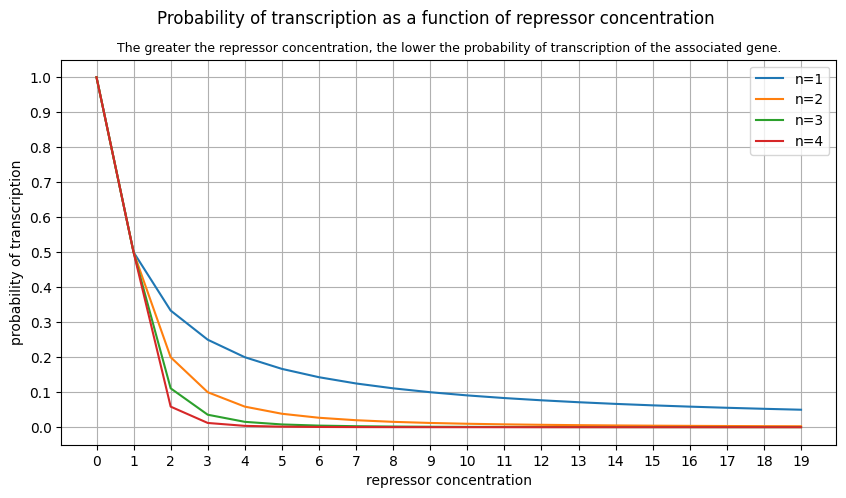

In [65]:
def calculate_transcription_probability(
    max_protein_expression,         
    repressor_concentration,        
    repressor_concentration_that_halves_max_protein_expression,
    n=1, # function shape param
):
    """
    A probability function (ranging between 0 and 1) that describes how
    a repressor modifies the probability of transcription of a gene.

    A repressor is a transcription factor that inhibits the expression of a gene.
    Thus, when the repressor concentration is high, the function returns a low value.
    """
    return max_protein_expression / (1 + (repressor_concentration/repressor_concentration_that_halves_max_protein_expression)**n)

MAX_PROTEIN_EXPRESSION = 1 # is this a probability? i don't think so. but then this should be moved outside of this function.
REPRESSOR_CONCENTRATION_THAT_HALVES_MAX_PROTEIN_EXPRESSION = 1

plt.figure(figsize=(10,5))
for n in range(1, 5):
    repressor_concentrations = [r for r in range(20)]
    transcription_probs = []
    for repressor_concentration in repressor_concentrations:
        prob_of_transcription = calculate_transcription_probability(
            max_protein_expression=MAX_PROTEIN_EXPRESSION,
            repressor_concentration=repressor_concentration,
            repressor_concentration_that_halves_max_protein_expression=REPRESSOR_CONCENTRATION_THAT_HALVES_MAX_PROTEIN_EXPRESSION,
            n=n
        )
        transcription_probs.append(prob_of_transcription)

    plt.plot(repressor_concentrations, transcription_probs, label=f"{n=}")
plt.title("The greater the repressor concentration, the lower the probability of transcription of the associated gene.", fontsize=9)
plt.suptitle("Probability of transcription as a function of repressor concentration")
plt.xlabel("repressor concentration")
plt.ylabel("probability of transcription")
plt.legend()
plt.xticks(ticks=[t for t in range(20)])
plt.yticks(ticks=[t/10 for t in range(11)])
plt.grid()
plt.show()